# **PLASTIC AI**
---
<img src="https://wwflac.awsassets.panda.org/img/stopplasticpollution_754336.jpg">

```
G17 University Ambassadors Consortium
SDG Goal 14 - Life below water
University of Moratuwa
P M Ranasinghe 
```

---

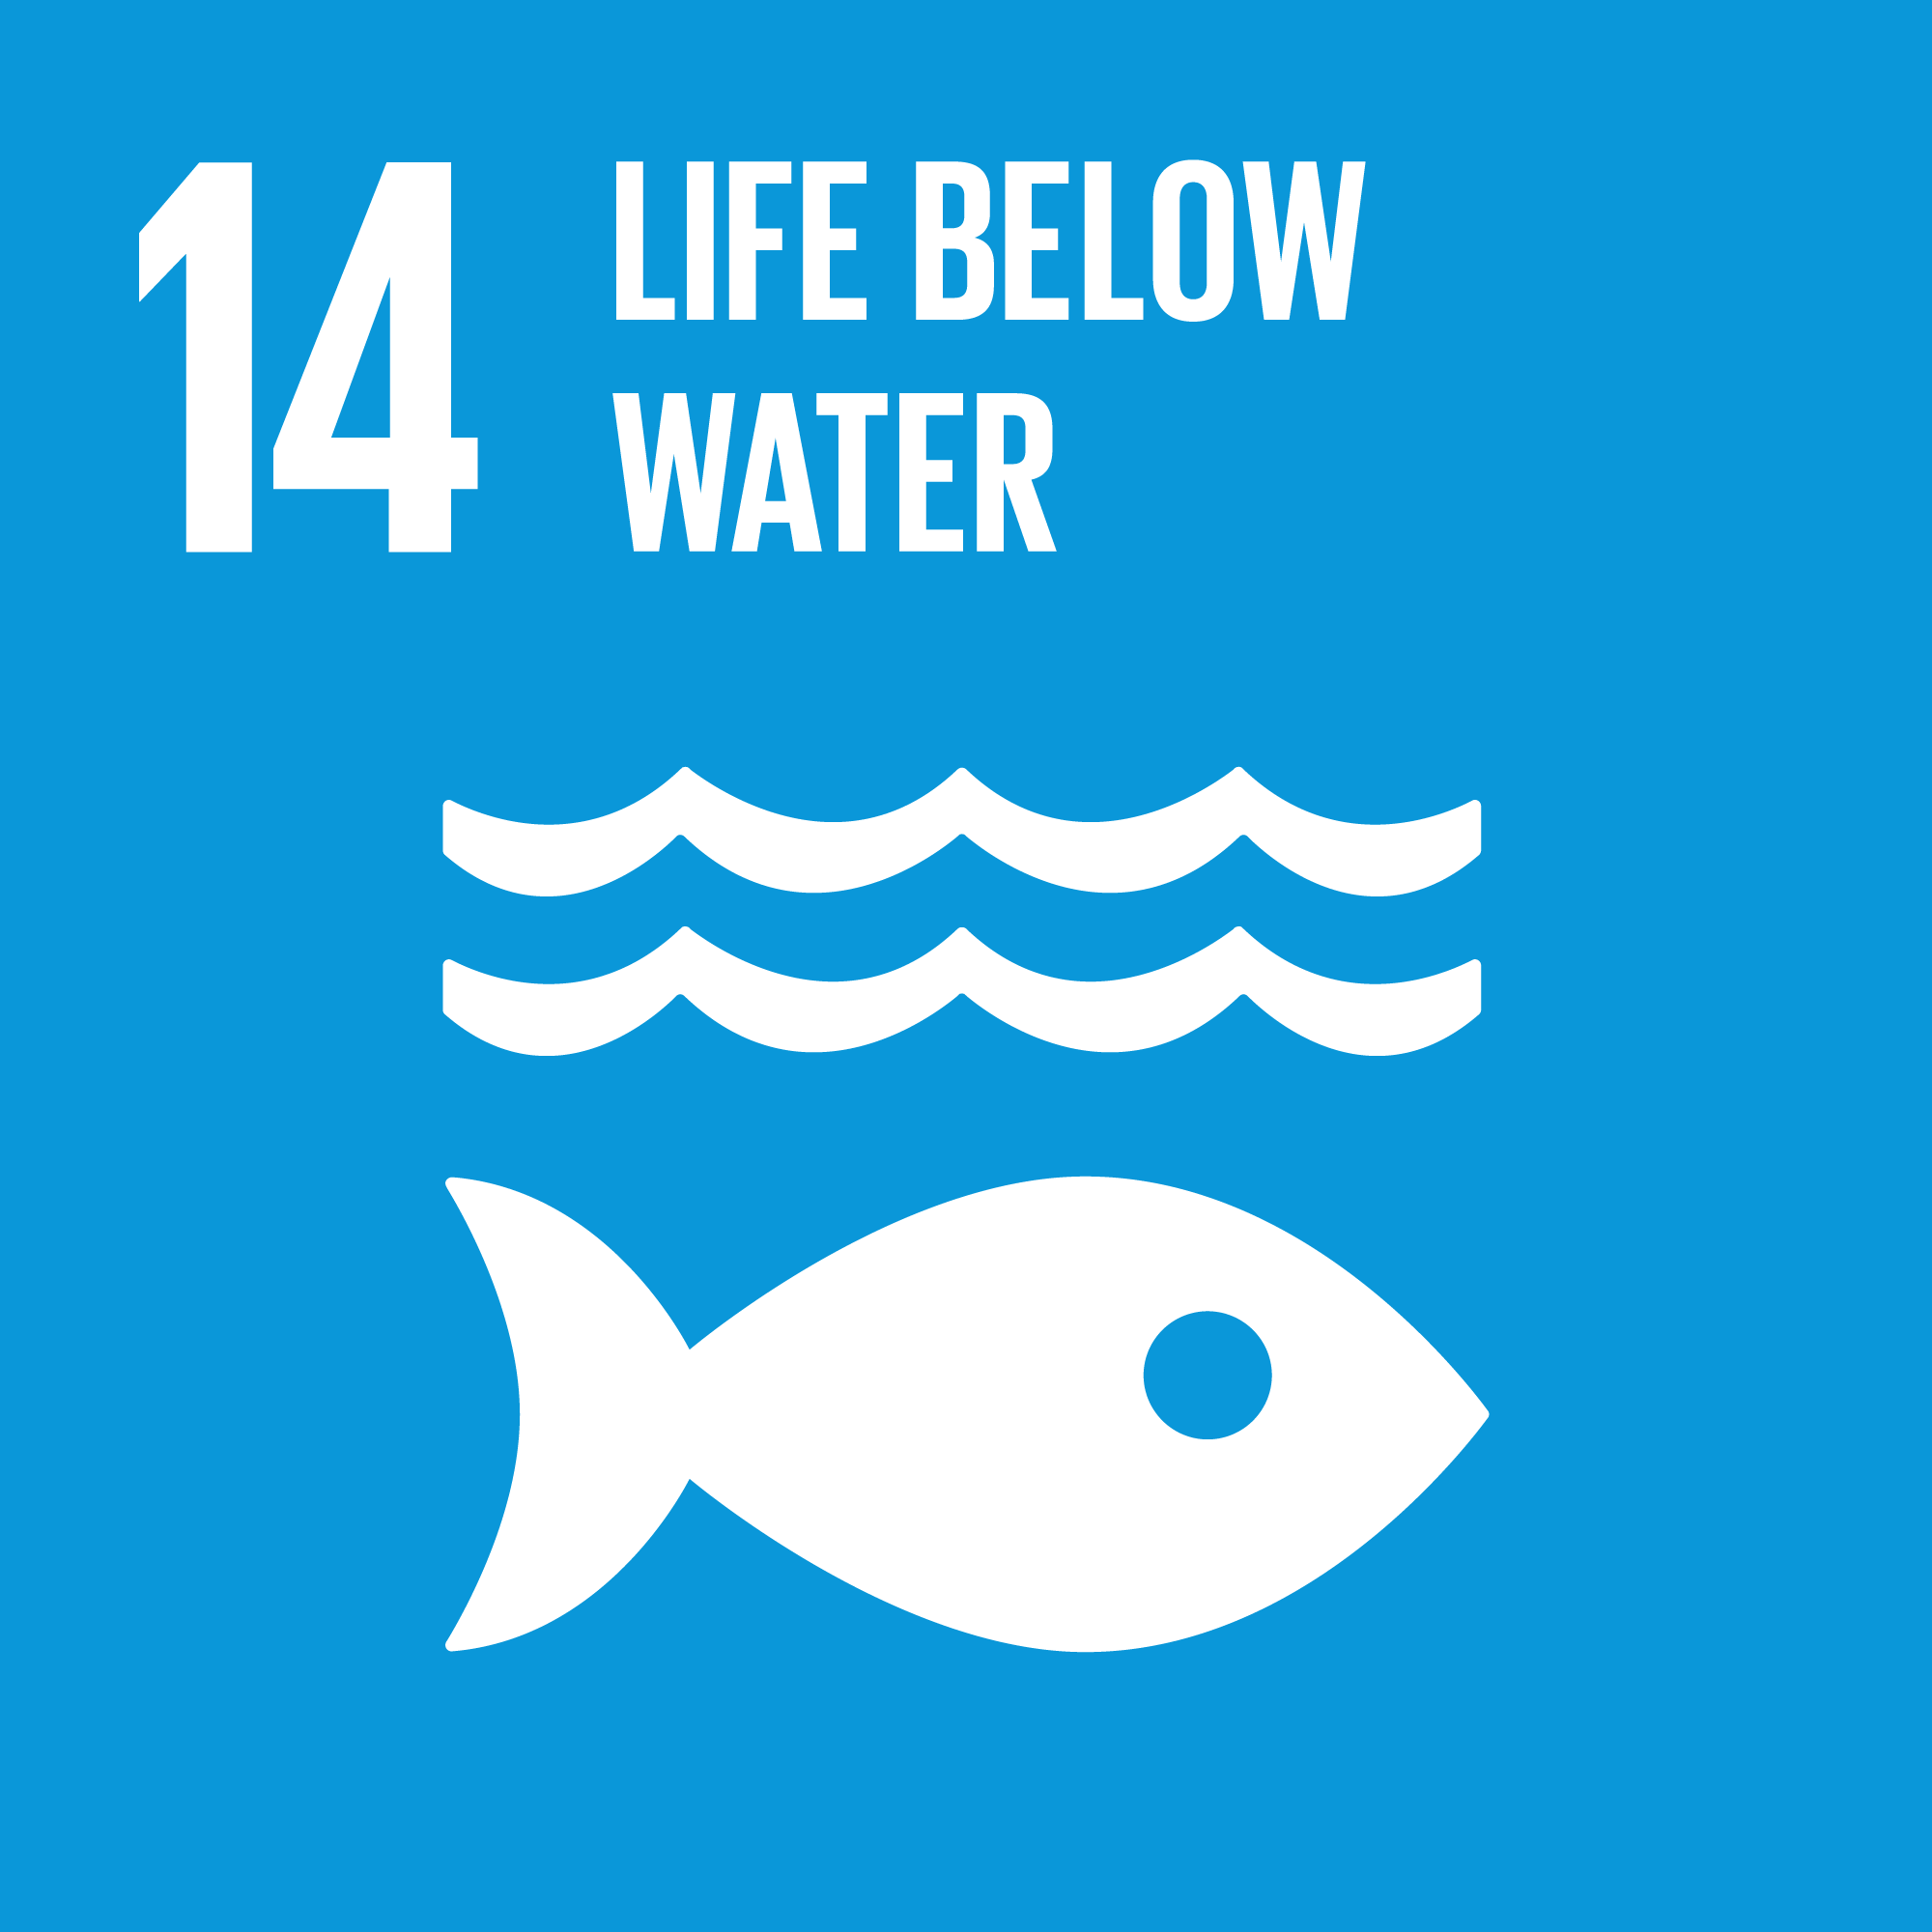

## **Training of YOLOv3-tiny model**

<img src="https://mark.trademarkia.com/logo-images/apple-inc/yolov3-88103984.jpg">

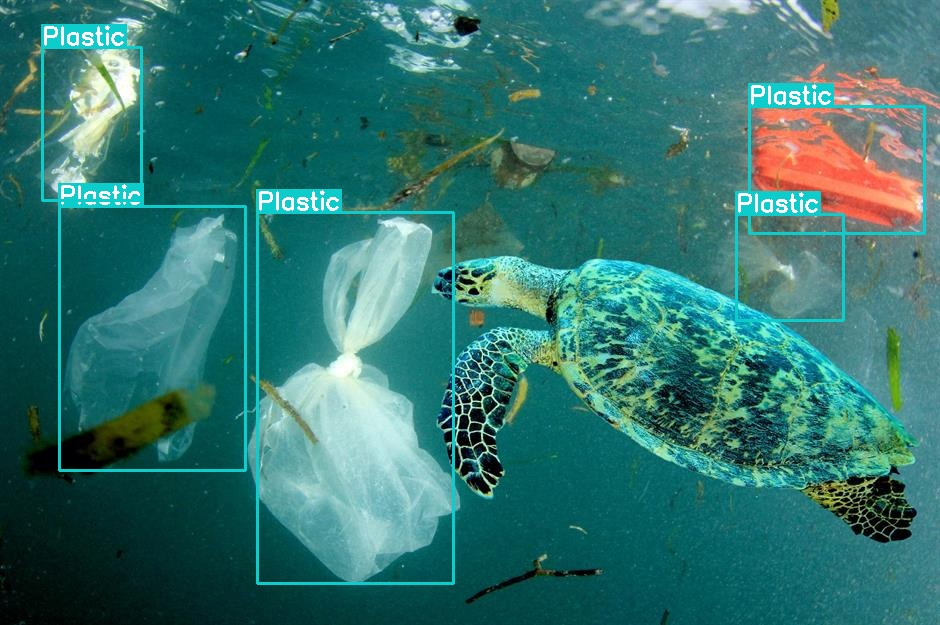


### **1) Clone `darknet` git repository onto the Colab VM** 

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


### **2) Create *`yolov3-tiny`* and *`training`* folders in your drive**

 Create a folder named ***yolov3-tiny*** in your drive. 
 
 Next, create another folder named ***training*** inside the ***yolov3-tiny*** folder. This is where we will save our trained weights 

### **3) Create & upload these files**

a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`

### **3(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov4-tiny`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov3-tiny*** folder on your drive.

### **3(b) Create your custom *`config`* file and upload it to your drive**

Download the **yolov3-tiny-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov4-tiny*** folder on your drive .

You can also download the custom config files from the official [AlexeyAB Github](https://www.github.com/AlexeyAB/darknet)

**need to make the following changes in your custom config file:**

*   batch=64
*   subdivisions=16
*   max_batches=6000
*   steps=4800,5400
*   set network size width=416 height=416 or any value multiple of 32
*   classes=1 (2 times)
*   filters=18 (2 times)

### **3(c) Create *`obj.data`* and *`obj.names`* files and upload them to your drive**

**obj.data**



```
classes = 1
train  = data/train.txt
valid  = data/test.txt
names = data/obj.names
backup = /mydrive/yolov3-tiny/training

```



**obj.names**
```
Plastic
```

### **3(d) Upload the *`process.py`* script file to the *`yolov4-tiny`* folder on your drive**

**To divide all image files into 2 parts. 90% for train and 10% for test.**

This *process.py* script creates the files *train.txt* & *test.txt* where the *train.txt* file has paths to 90% of the images and *test.txt* has paths to 10% of the images.

### **4) Mount drive and link the training folder**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list contents in yolov4-tiny folder in your drive
!ls /mydrive/yoloV3-tiny

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
obj.data  obj.names  obj.zip  process.py  training  yolov3-tiny.cfg


### **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


### **6) Run `make` command to build darknet**

In [ ]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

### **7) Copy files from your drive to the darknet directory**

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/darknet/data
/content/darknet


In [ ]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yoloV3-tiny/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/frame_00420_png_jpg.rf.80a5f2b387526351b021331f66db6271.jpg  
  inflating: data/obj/frame_00420_png_jpg.rf.80a5f2b387526351b021331f66db6271.txt  
  inflating: data/obj/frame_00420_png_jpg.rf.8eed7abf28c22e13887131b7ff3bd897.jpg  
  inflating: data/obj/frame_00420_png_jpg.rf.8eed7abf28c22e13887131b7ff3bd897.txt  
  inflating: data/obj/frame_00420_png_jpg.rf.e858adf103d9a8b764e22b3a630ea1b1.jpg  
  inflating: data/obj/frame_00420_png_jpg.rf.e858adf103d9a8b764e22b3a630ea1b1.txt  
  inflating: data/obj/frame_00425_png.rf.08496a7533ab1c8ebfc11d47597aef8f.jpg  
  inflating: data/obj/frame_00425_png.rf.08496a7533ab1c8ebfc11d47597aef8f.txt  
  inflating: data/obj/frame_00425_png.rf.54d4130da3f82eca3c4ef6ed34df7acd.jpg  
  inflating: data/obj/frame_00425_png.rf.54d4130da3f82eca3c4ef6ed34df7acd.txt  
  inflating: data/obj/frame_00425_png.rf.550c13ad9bff4d070d8c640211cc92f2.jpg  
  inflating: data/obj/frame_00425_png.rf.550c

In [ ]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yoloV3-tiny/yolov3-tiny.cfg ./cfg

In [ ]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yoloV3-tiny/obj.names ./data
!cp /mydrive/yoloV3-tiny/obj.data  ./data

In [ ]:
#copy the process.py file from the drive to the darknet directory
!cp /mydrive/yoloV3-tiny/process.py ./

### **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/darknet
labels	obj  obj.data  obj.names  test.txt  train.txt


### **9) Download the pre-trained *`yolov3-tiny`* weights**

In [ ]:
# Download the yolov4-tiny pre-trained weights file
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
!wget https://drive.google.com/u/0/uc?id=18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf&export=download
#Change the name of the downloaded weigth file into yolov3-tiny.cov.11

--2021-09-27 08:11:29--  https://drive.google.com/u/0/uc?id=18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf
Resolving drive.google.com (drive.google.com)... 74.125.203.101, 74.125.203.113, 74.125.203.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d6i56cjf7nurm3a7i4ap4ot24nlg6t0m/1632730275000/14889149095783116612/*/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf [following]
--2021-09-27 08:11:30--  https://doc-0g-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d6i56cjf7nurm3a7i4ap4ot24nlg6t0m/1632730275000/14889149095783116612/*/18v36esoXCh-PsOKwyP2GWrpYDptDY8Zf
Resolving doc-0g-7k-docs.googleusercontent.com (doc-0g-7k-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0g-7k-docs.googleusercontent.com (doc-0g-7k-docs.googleusercontent.com)|74

### **10) Training**

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov3-tiny.cfg yolov3-tiny.conv.11 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.806259), count: 2, class_loss = 0.023079, iou_loss = 0.062457, total_loss = 0.085536 
 total_bbox = 473626, rewritten_bbox = 0.028504 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.769854), count: 3, class_loss = 0.236683, iou_loss = 0.116980, total_loss = 0.353663 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.707921), count: 1, class_loss = 0.213861, iou_loss = 0.054318, total_loss = 0.268180 
 total_bbox = 473630, rewritten_bbox = 0.028503 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.827038), count: 3, class_loss = 0.122568, iou_loss = 0.054617, total_loss = 0.177185 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.448954), count: 1, class_loss = 0.212598, iou_loss = 0.282217, total_loss = 0.494815 
 total_

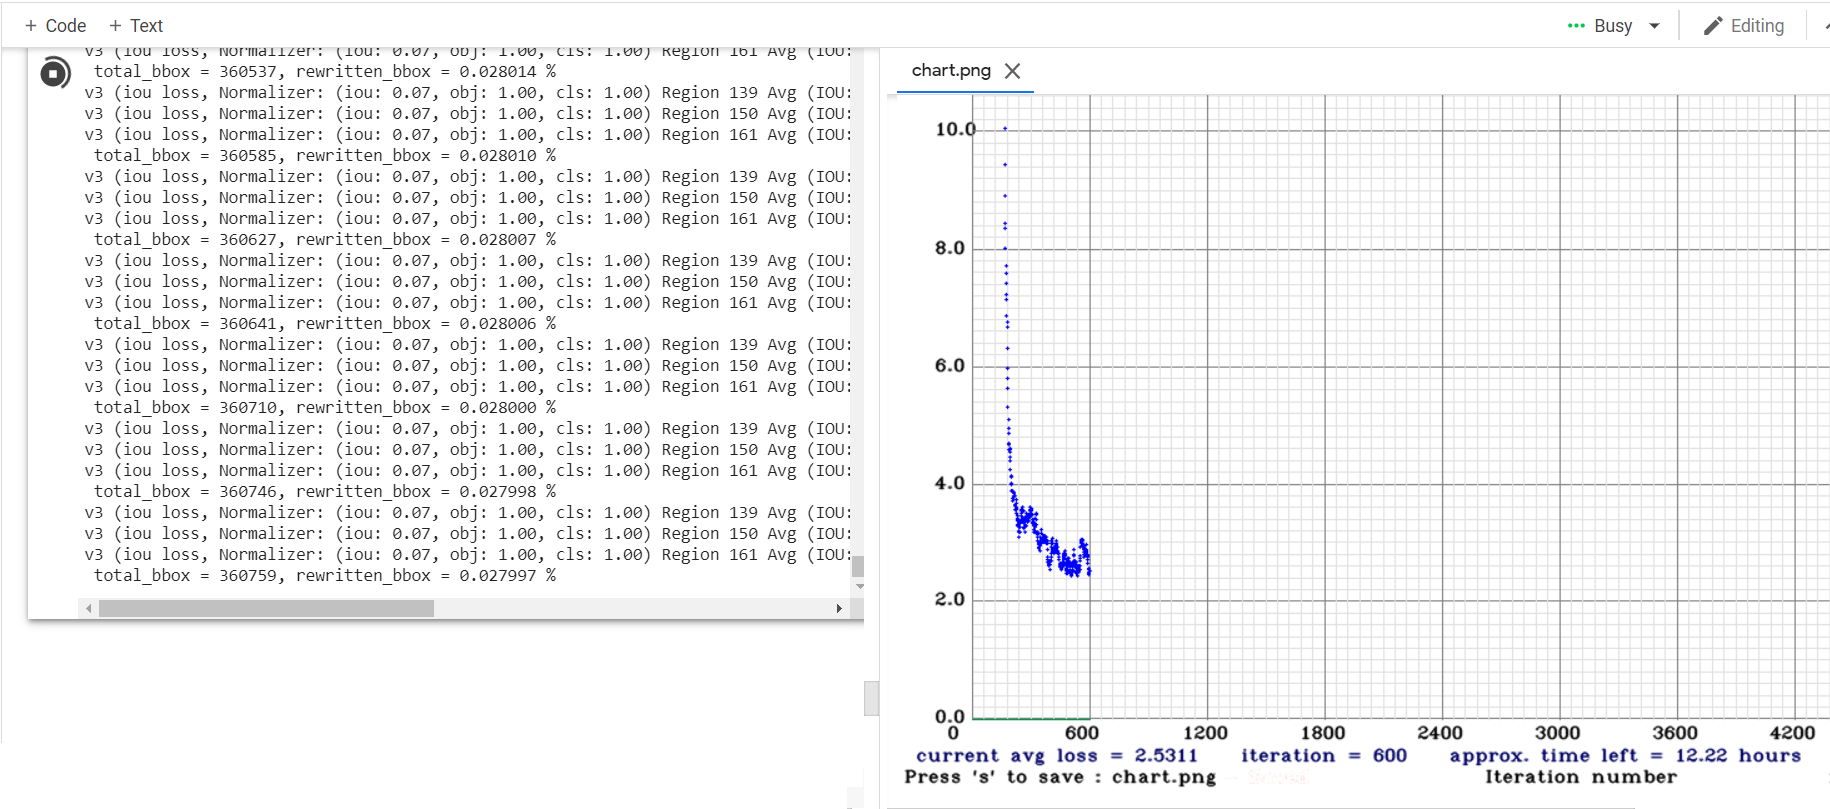

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

**To restart your training (In case the training does not finish and you get disconnected)**




In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_last.weights -dont_show -map

**11) Check performance** 



In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

#only works if the training does not get interrupted 
imShow('chart.png')

**Check mAP (mean average precision)**

In [ ]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -points 0

## **Testing**


## **Make changes to your custom config file**
*   batch=1
*   subdivisions=1


In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

## **Run detector on an image**

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image1.jpg -thresh 0.3
imShow('predictions.jpg')

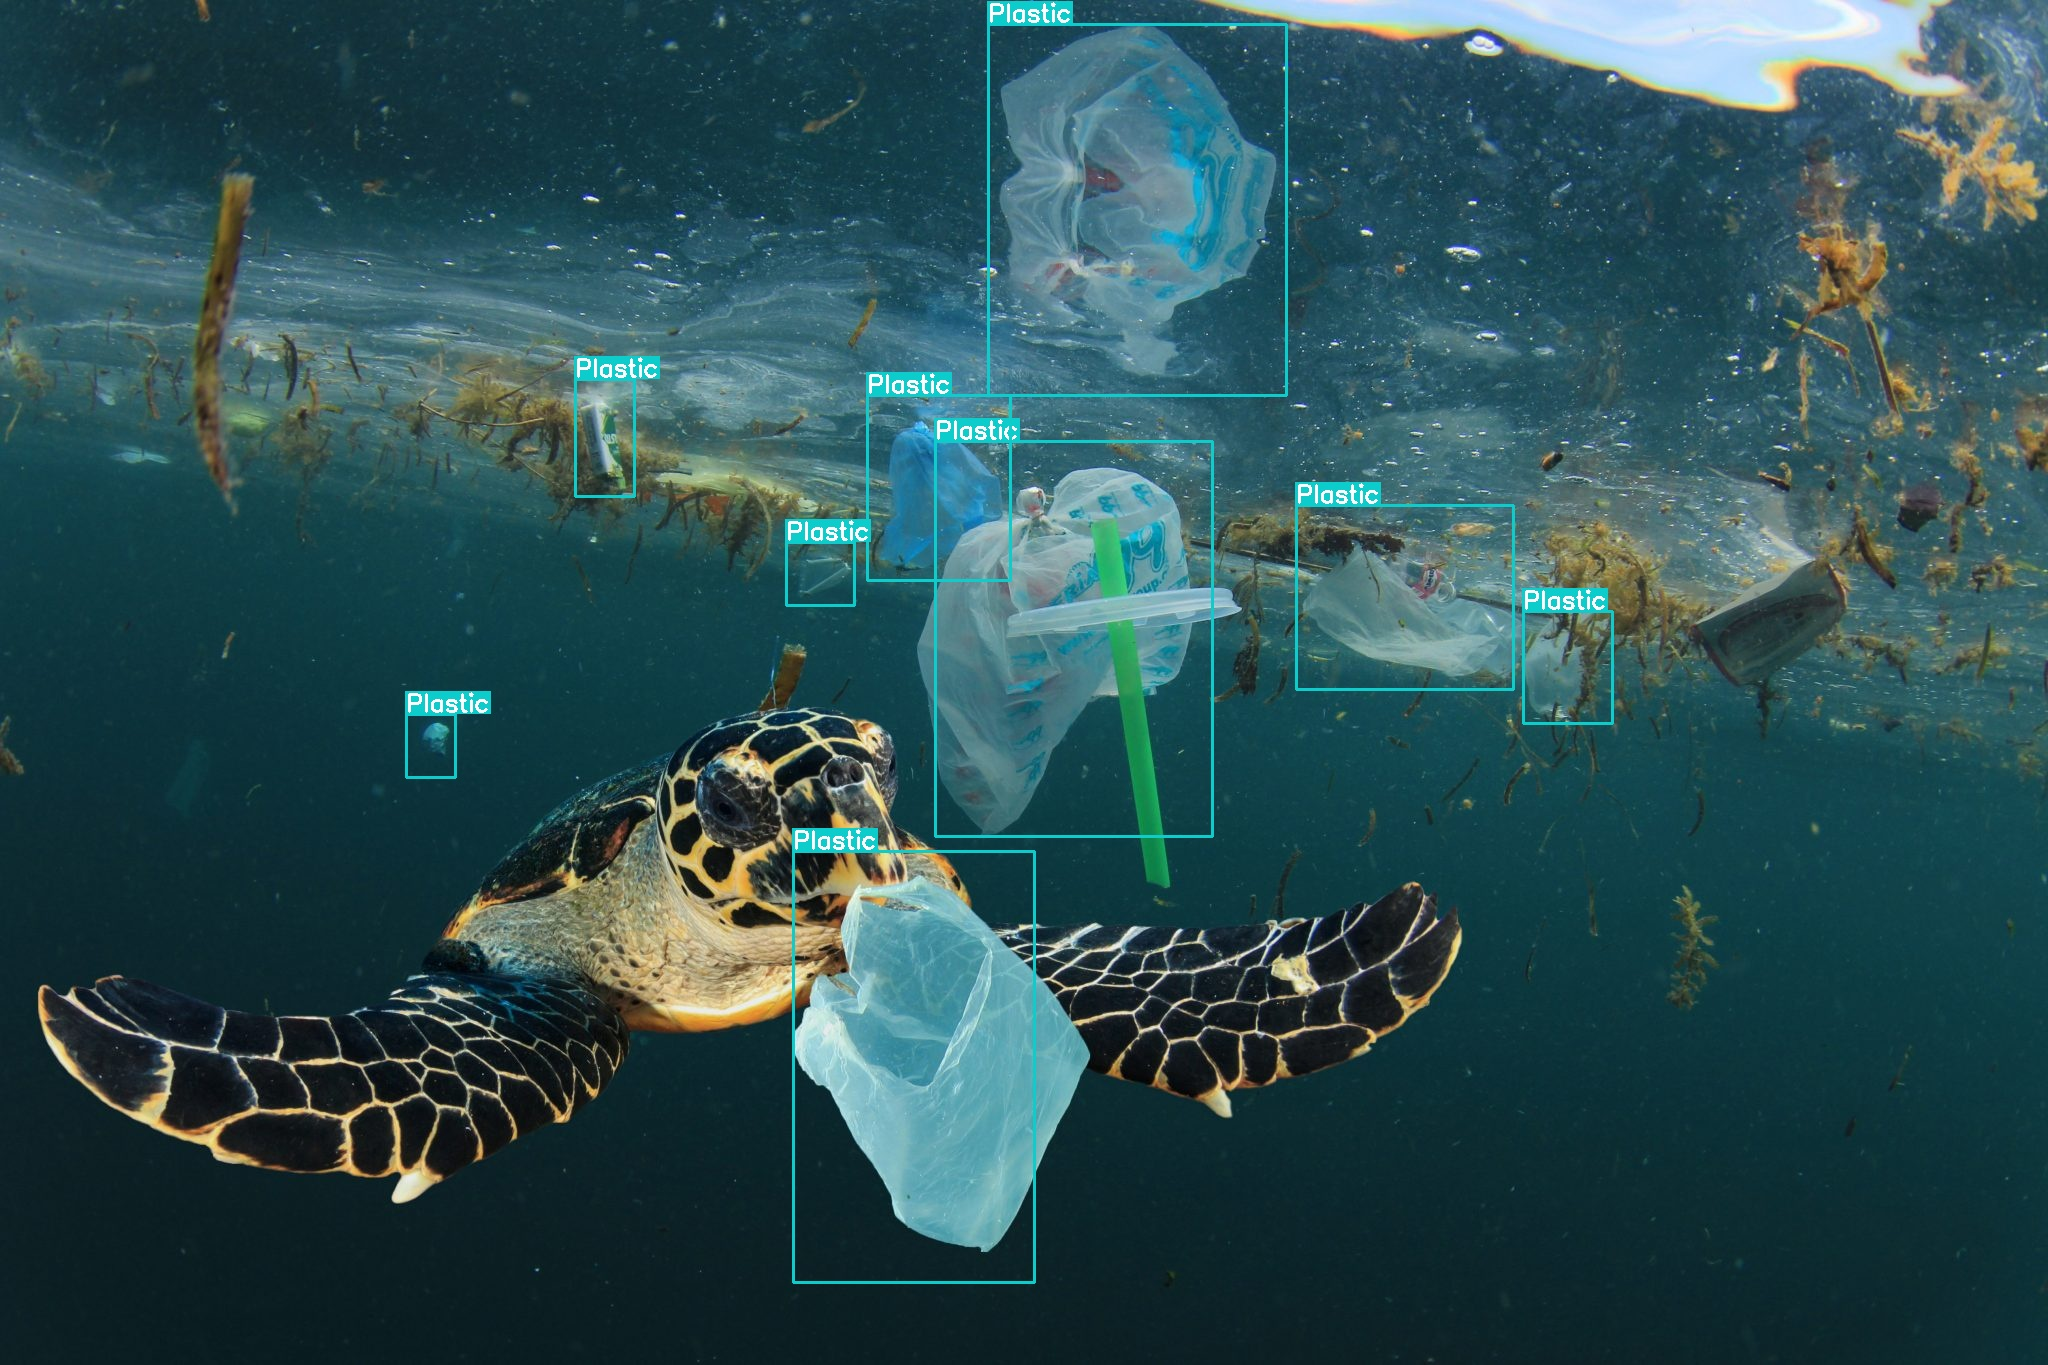

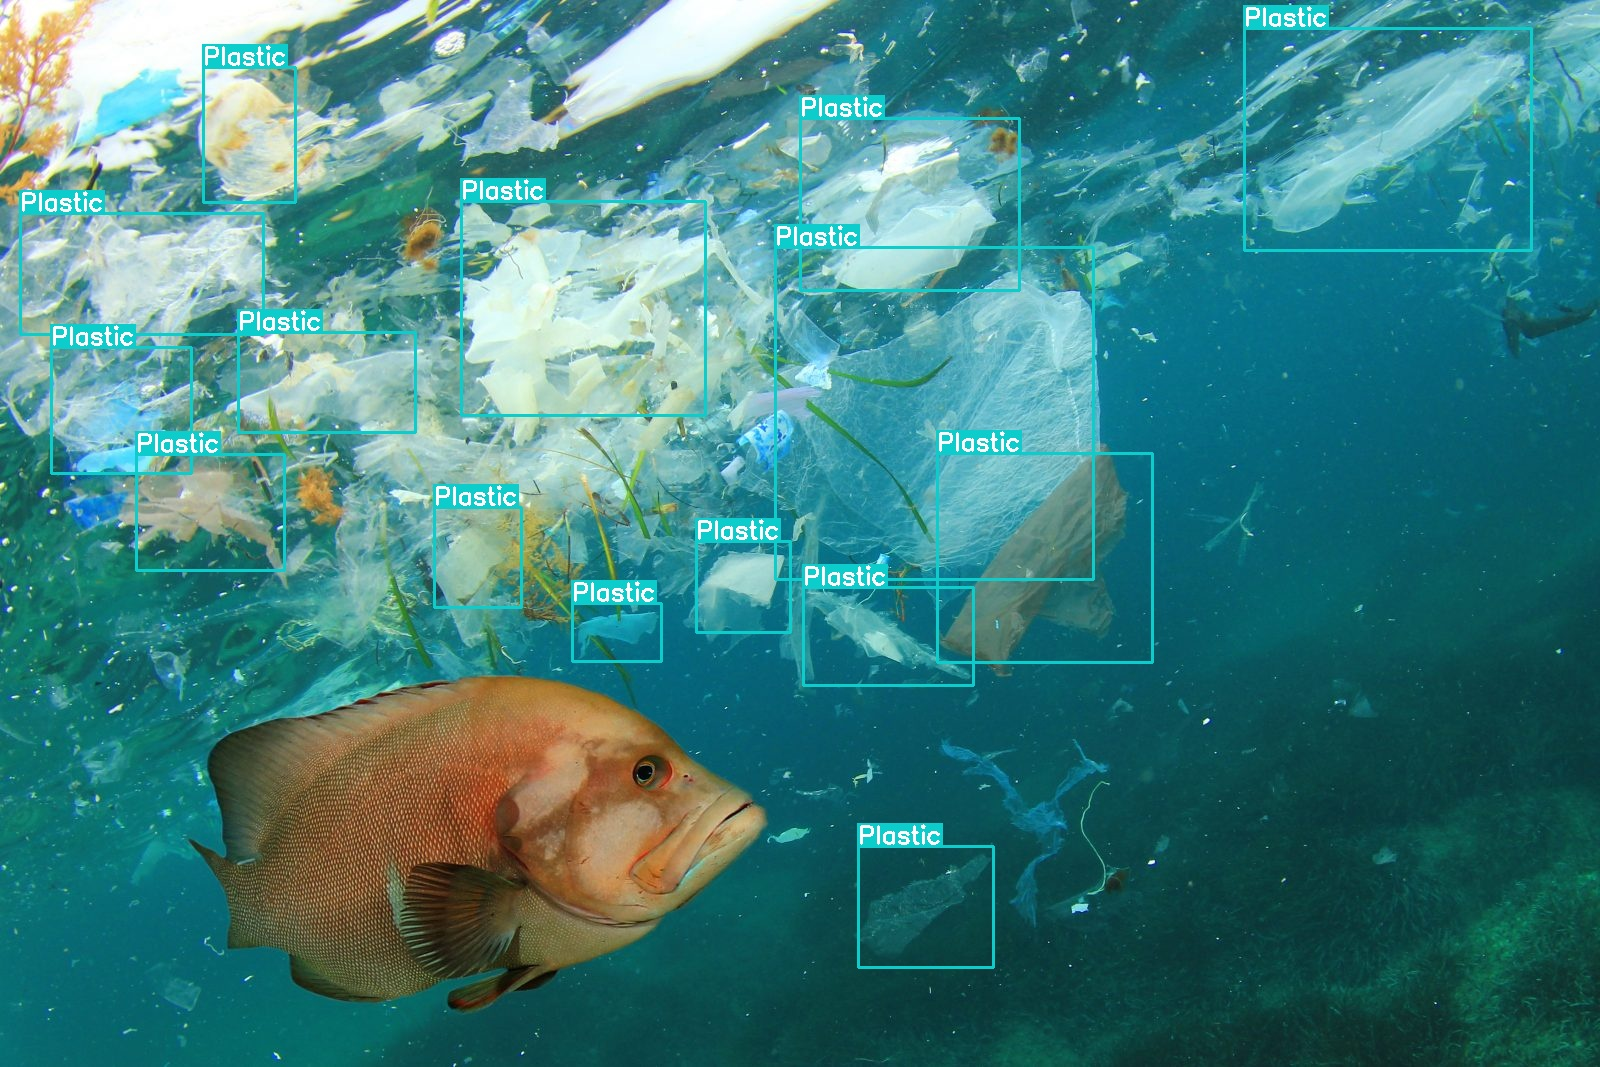





---

